In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('ProcessedData.csv')
data

,Price,Car,madeIn,status,carType,Km,carColor,carSeat,engine,gear,Wheeldrive
0,0.764,1.350,1.02,1.01,1.05,0,1.004,5,1.004,1.01,1.004
1,0.599,1.229,1.02,1.01,1.05,0,1.001,5,1.006,1.02,1.002
2,0.750,1.418,1.01,1.01,1.04,0,1.005,8,1.002,1.02,1.002
3,0.626,1.062,1.01,1.01,1.01,0,1.013,5,1.001,1.01,1.001
4,4.350,1.352,1.02,1.01,1.06,0,1.001,7,1.021,1.01,1.003
...,...,...,...,...,...,...,...,...,...,...,...
11025,0.298,1.248,1.01,1.02,1.03,35,1.003,5,1.005,1.02,1.001
11026,0.475,1.095,1.01,1.02,1.02,45,1.008,5,1.001,1.01,1.001
11027,0.365,1.261,1.01,1.02,1.02,45,1.011,5,1.003,1.02,1.001
11028,0.365,1.261,1.01,1.02,1.02,45,1.001,5,1.003,1.02,1.001


In [3]:
# Tổng quan về dữ liệu thu thập được.
data.describe()

,Price,Car,madeIn,status,carType,Km,carColor,carSeat,engine,gear,Wheeldrive
count,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000
mean,1.064280,1.177544,1.013161,1.015238,1.024112,15.400272,1.003384,5.754488,1.005587,1.011594,1.001651
std,1.246588,0.157693,0.004650,0.004995,0.014735,54.538020,0.002796,1.693998,0.005435,0.003663,0.000906
min,0.109000,1.000000,1.010000,1.010000,1.010000,0.000000,1.001000,2.000000,1.001000,1.010000,1.001000
25%,0.545000,1.045000,1.010000,1.010000,1.010000,0.000000,1.001000,5.000000,1.002000,1.010000,1.001000
50%,0.734000,1.130000,1.010000,1.020000,1.020000,0.000000,1.002000,5.000000,1.003000,1.010000,1.001000
75%,1.065000,1.279000,1.020000,1.020000,1.030000,20.000000,1.005000,7.000000,1.008000,1.010000,1.002000
max,9.999000,1.591000,1.020000,1.020000,1.070000,999.000000,1.017000,16.000000,1.033000,1.030000,1.004000


# Train dữ liệu.

In [4]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [5]:
# Tách giá trị Price.
y_sr = data["Price"]
X_df = data.drop("Price", axis=1)
X_df

,Car,madeIn,status,carType,Km,carColor,carSeat,engine,gear,Wheeldrive
0,1.350,1.02,1.01,1.05,0,1.004,5,1.004,1.01,1.004
1,1.229,1.02,1.01,1.05,0,1.001,5,1.006,1.02,1.002
2,1.418,1.01,1.01,1.04,0,1.005,8,1.002,1.02,1.002
3,1.062,1.01,1.01,1.01,0,1.013,5,1.001,1.01,1.001
4,1.352,1.02,1.01,1.06,0,1.001,7,1.021,1.01,1.003
...,...,...,...,...,...,...,...,...,...,...
11025,1.248,1.01,1.02,1.03,35,1.003,5,1.005,1.02,1.001
11026,1.095,1.01,1.02,1.02,45,1.008,5,1.001,1.01,1.001
11027,1.261,1.01,1.02,1.02,45,1.011,5,1.003,1.02,1.001
11028,1.261,1.01,1.02,1.02,45,1.001,5,1.003,1.02,1.001


In [6]:
# Tách tập train và tập test với tỉ lệ 4:1
train_X_df, test_X_df, train_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size=0.2, random_state=1997)

In [7]:
# Train data
pipe2 = Pipeline([("std_scaler", StandardScaler()),
                ('xgboost',xgb.XGBRegressor())])
pipe2.fit(train_X_df,train_y_sr)
preds2=pipe2.predict(test_X_df)

#RMSE Độ chênh lệch giá tiền tối đa.
RMSE2= np.sqrt(mean_squared_error(preds2,test_y_sr))
print("RMSE in test=", RMSE2)

RMSE in test= 0.1390102853211574


In [8]:
def compute_mse(y, preds):
    return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)
baseline_preds = train_y_sr.mean()

In [9]:
# Trọng số R, độ chính xác của model dự đoán
compute_rr(test_y_sr, preds2, baseline_preds)

0.9876228152066427

In [10]:
dataset = pd.DataFrame({'testprice': test_y_sr, 'pred': preds2})

In [14]:
dataset.reset_index(drop=True, inplace=True)

In [12]:
# Kiểm tra lại xem có giá trị nào được dự đoán là âm không.
print(dataset[dataset.pred<0])

Empty DataFrame
Columns: [testprice, pred]
Index: []


In [15]:
dataset

,testprice,pred
0,0.969,0.899519
1,0.950,0.929630
2,0.826,0.830750
3,0.539,0.501697
4,1.799,1.769773
...,...,...
2201,0.605,0.599004
2202,0.910,0.953651
2203,0.482,0.476829
2204,0.825,0.831378


In [25]:
check=dataset.loc[:40]

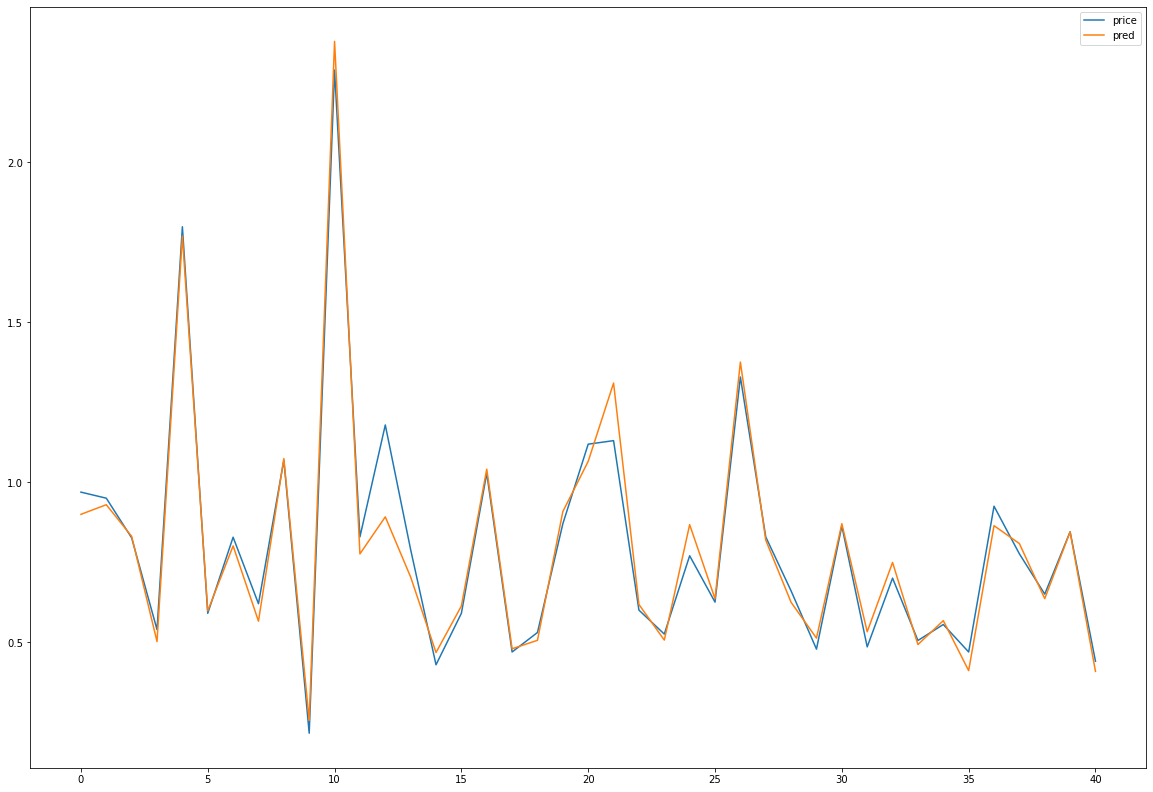

In [26]:
# Biểu đồ bên dưới thể hiện độ chênh lệch giữa giá trị thực và giá trị dự đoán sau khi được train.
plt.figure(figsize=(20,14))
plt.plot(check.index, check.testprice, label = "price")
plt.plot(check.index, check.pred, label = "pred")
plt.legend()
plt.show()

In [27]:
check.loc[10:15]

,testprice,pred
10,2.289,2.378801
11,0.829,0.775877
12,1.179,0.891642
13,0.789,0.703313
14,0.429,0.467352
15,0.590,0.612824


In [2]:
# Filter số lượng data có lượng chênh lệch giá tiền nằm trong khoảng dự đoán.
dataset[abs(dataset.pred-dataset.testprice)>= RMSE2]

NameError: name 'dataset' is not defined